In [ ]:
# Pour l'analyse de données
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pour le prétraitement et la modélisation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Pour les modèles de machine learning SciKit Learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier





In [ ]:
import pandas as pd

# Chargement des données
data_path = '/content/Credit_card.csv'
data = pd.read_csv(data_path)

# Chargement des étiquettes
labels_path = '/content/Credit_card_label.csv'
labels = pd.read_csv(labels_path)

# Affichage des premières lignes des données
print("Les premières lignes des données:")
print(data.head())

# Affichage des premières lignes des étiquettes
print("\nLes premières lignes des étiquettes:")
print(labels.head())


Les premières lignes des données:
    Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMA

**Nettoyage et prétraitement des données**



1.   -Gérer les valeurs manquantes par remplissage
lignes/colonnes concernées.
2.  -Encoder les variables catégoriques : Transformer les variables catégoriques en variables numériques que le modèle peut comprendre.
1. -Normaliser les données : S'assurer que les caractéristiques numériques sont sur une échelle comparable .











In [ ]:
# Identification des valeurs manquantes
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values


GENDER               7
Annual_income       23
Birthday_count      22
Type_Occupation    488
dtype: int64

In [ ]:
# Remplissage des valeurs manquantes
data['GENDER'].fillna(data['GENDER'].mode()[0], inplace=True)
data['Annual_income'].fillna(data['Annual_income'].median(), inplace=True)
data['Birthday_count'].fillna(data['Birthday_count'].median(), inplace=True)
data['Type_Occupation'].fillna("Inconnu", inplace=True)


Encodage Label pour les variables binaires (GENDER, Car_Owner, Propert_Owner), convertir les catégories en 0 et 1.
Encodage One-Hot pour les variables avec plus de deux catégories (Type_Income, EDUCATION, Marital_status, Housing_type), ce qui crée une nouvelle colonne pour chaque catégorie et indique la présence (1) ou l'absence (0) de chaque catégorie.

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Encodage Label pour les variables binaires
label_encoder = LabelEncoder()
binary_columns = ['GENDER', 'Car_Owner', 'Propert_Owner']
for col in binary_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Encodage One-Hot pour les variables avec plusieurs catégories
data = pd.get_dummies(data, columns=['Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type'])

# Affichage des premières lignes pour vérifier l'encodage
print(data.head())


    Ind_ID  GENDER  Car_Owner  Propert_Owner  CHILDREN  Annual_income  \
0  5008827       1          1              1         0       180000.0   
1  5009744       0          1              0         0       315000.0   
2  5009746       0          1              0         0       315000.0   
3  5009749       0          1              0         0       166500.0   
4  5009752       0          1              0         0       315000.0   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  ...  \
0        -18772.0         365243             1           0  ...   
1        -13557.0           -586             1           1  ...   
2        -15661.5           -586             1           1  ...   
3        -13557.0           -586             1           1  ...   
4        -13557.0           -586             1           1  ...   

   Marital_status_Married  Marital_status_Separated  \
0                       1                         0   
1                       1                       

In [ ]:
# Vérification des valeurs uniques pour Car_Owner et Propert_Owner
unique_car_owner = data['Car_Owner'].unique()
unique_property_owner = data['Propert_Owner'].unique()

unique_car_owner, unique_property_owner


(array([1, 0]), array([1, 0]))

Ajustement des caractéristiques numériques pour qu'elles aient une moyenne de 0 et un écart-type de 1, ce qui peut améliorer les performances de nombreux modèles d'apprentissage automatique.


In [ ]:
from sklearn.preprocessing import StandardScaler

# Identification des colonnes numériques (excluant 'Ind_ID' qui est un identifiant unique)
numeric_columns = ['CHILDREN', 'Annual_income', 'Birthday_count', 'Employed_days', 'Family_Members']

# Application de StandardScaler
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Vérification des premières lignes pour confirmer la normalisation
data.head()


,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,...,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,Housing_type_Co-op apartment,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents
0,5008827,1,1,1,-0.531645,-0.098116,-0.651955,2.220314,1,0,...,1,0,0,0,0,1,0,0,0,0
1,5009744,0,1,0,-0.531645,1.102824,0.590242,-0.435171,1,1,...,1,0,0,0,0,1,0,0,0,0
2,5009746,0,1,0,-0.531645,1.102824,0.088957,-0.435171,1,1,...,1,0,0,0,0,1,0,0,0,0
3,5009749,0,1,0,-0.531645,-0.218210,0.590242,-0.435171,1,1,...,1,0,0,0,0,1,0,0,0,0
4,5009752,0,1,0,-0.531645,1.102824,0.590242,-0.435171,1,1,...,1,0,0,0,0,1,0,0,0,0


 fusionner les données avec les étiquettes, car la matrice de corrélations inclut la relation de chaque caractéristique avec la variable cible (label).

In [ ]:
# Fusion des données avec les étiquettes
full_data = data.merge(labels, on='Ind_ID')

# Calcul de la matrice de corrélations
correlation_matrix = full_data.corr()

# Affichage de la matrice de corrélations
correlation_matrix


<ipython-input-24-267e8db1f02b>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = full_data.corr()


,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,...,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,Housing_type_Co-op apartment,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents,label
Ind_ID,1.000000,0.027597,-0.046811,-0.050421,0.032535,0.031019,0.022750,-0.055396,NaN,0.085794,...,0.007515,0.013948,0.012707,0.043241,-0.060418,0.065992,0.015547,0.005193,0.011548,0.016796
GENDER,0.027597,1.000000,0.366257,-0.038264,0.063068,0.207970,0.182646,-0.176383,NaN,0.042434,...,-0.062380,0.002683,-0.159302,0.003906,-0.079101,0.004076,0.047559,0.084519,0.046292,0.045664
Car_Owner,-0.046811,0.366257,1.000000,0.002401,0.063467,0.208948,0.144234,-0.150658,NaN,0.029856,...,-0.058413,-0.091225,-0.093429,-0.046780,0.032690,-0.067821,0.058412,0.017474,-0.007425,-0.014734
Propert_Owner,-0.050421,-0.038264,0.002401,1.000000,-0.003352,0.043012,-0.124409,0.100686,NaN,-0.170760,...,0.002049,-0.004246,0.013053,-0.030179,0.212018,-0.146075,-0.033405,-0.019954,-0.148273,-0.017906
CHILDREN,0.032535,0.063068,0.063467,-0.003352,1.000000,0.078543,0.277944,-0.219095,NaN,0.035014,...,0.001284,-0.133364,-0.096715,-0.030264,0.025007,-0.045196,0.003118,-0.012001,0.014946,-0.021646
Annual_income,0.031019,0.207970,0.208948,0.043012,0.078543,1.000000,0.110682,-0.158966,NaN,-0.070944,...,-0.001372,0.065766,-0.065196,-0.040678,0.009001,-0.039948,0.045559,0.021355,0.003787,0.024425
Birthday_count,0.022750,0.182646,0.144234,-0.124409,0.277944,0.110682,1.000000,-0.614271,NaN,0.173290,...,-0.084516,0.110851,-0.245392,-0.015515,-0.167575,-0.008250,-0.019293,0.084223,0.208817,-0.044918
Employed_days,-0.055396,-0.176383,-0.150658,0.100686,-0.219095,-0.158966,-0.614271,1.000000,NaN,-0.231184,...,0.034051,-0.030003,0.268019,-0.026114,0.061684,0.067241,-0.034679,-0.037385,-0.103760,0.031408
Mobile_phone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Work_Phone,0.085794,0.042434,0.029856,-0.170760,0.035014,-0.070944,0.173290,-0.231184,NaN,1.000000,...,-0.052587,-0.045974,-0.056341,0.054976,-0.046329,0.008538,0.002678,-0.005066,0.045718,-0.007046


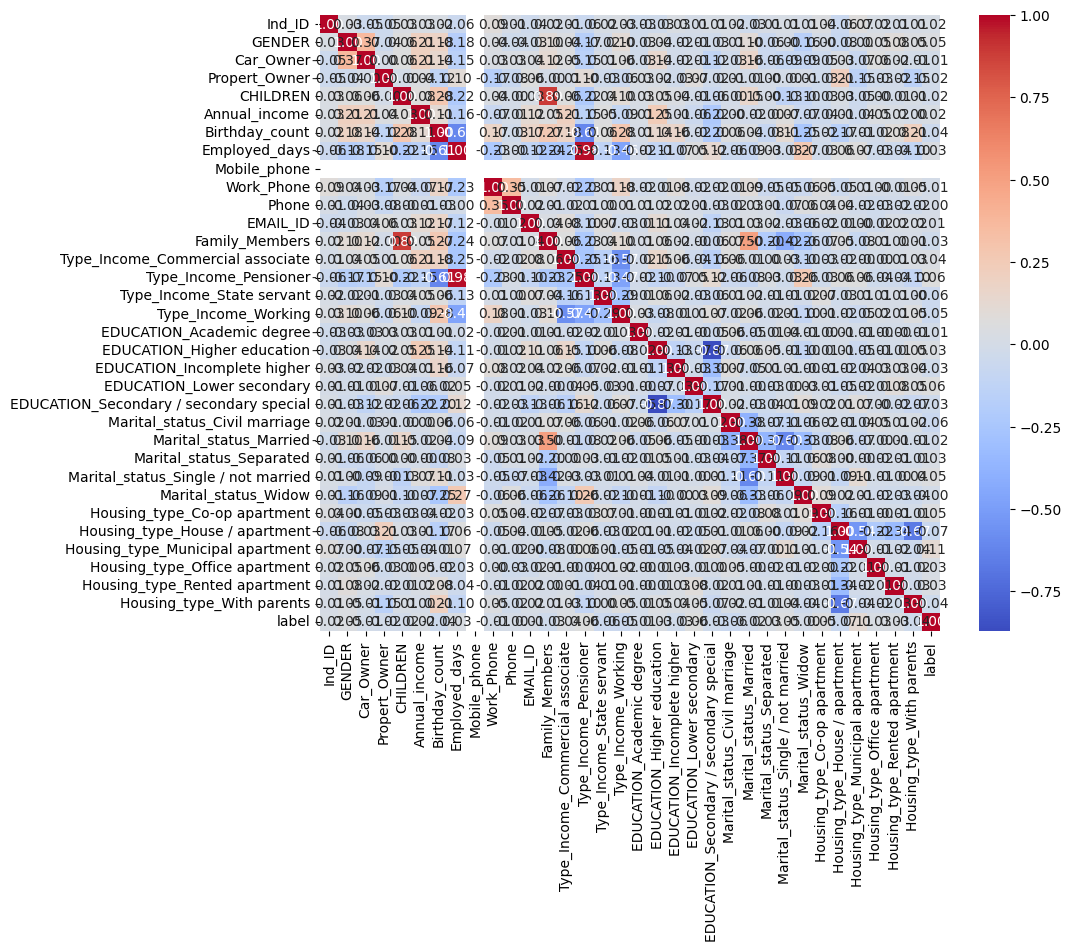

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()





 Filtrer la matrice de corrélations pour ne montrer que les paires de caractéristiques ayant une corrélation au-dessus d'un certain seuil, par exemple, une corrélation absolue supérieure à 0.8 ou 0.9, ce qui pourrait indiquer une forte corrélation.


In [ ]:

correlation_matrix_abs = correlation_matrix.abs()


high_corr_var=np.where(correlation_matrix_abs > 0.8)
high_corr_var=[(correlation_matrix_abs.columns[x],correlation_matrix_abs.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]


for var_pair in high_corr_var:
    print(var_pair)


('CHILDREN', 'Family_Members')
('Employed_days', 'Type_Income_Pensioner')
('EDUCATION_Higher education', 'EDUCATION_Secondary / secondary special')


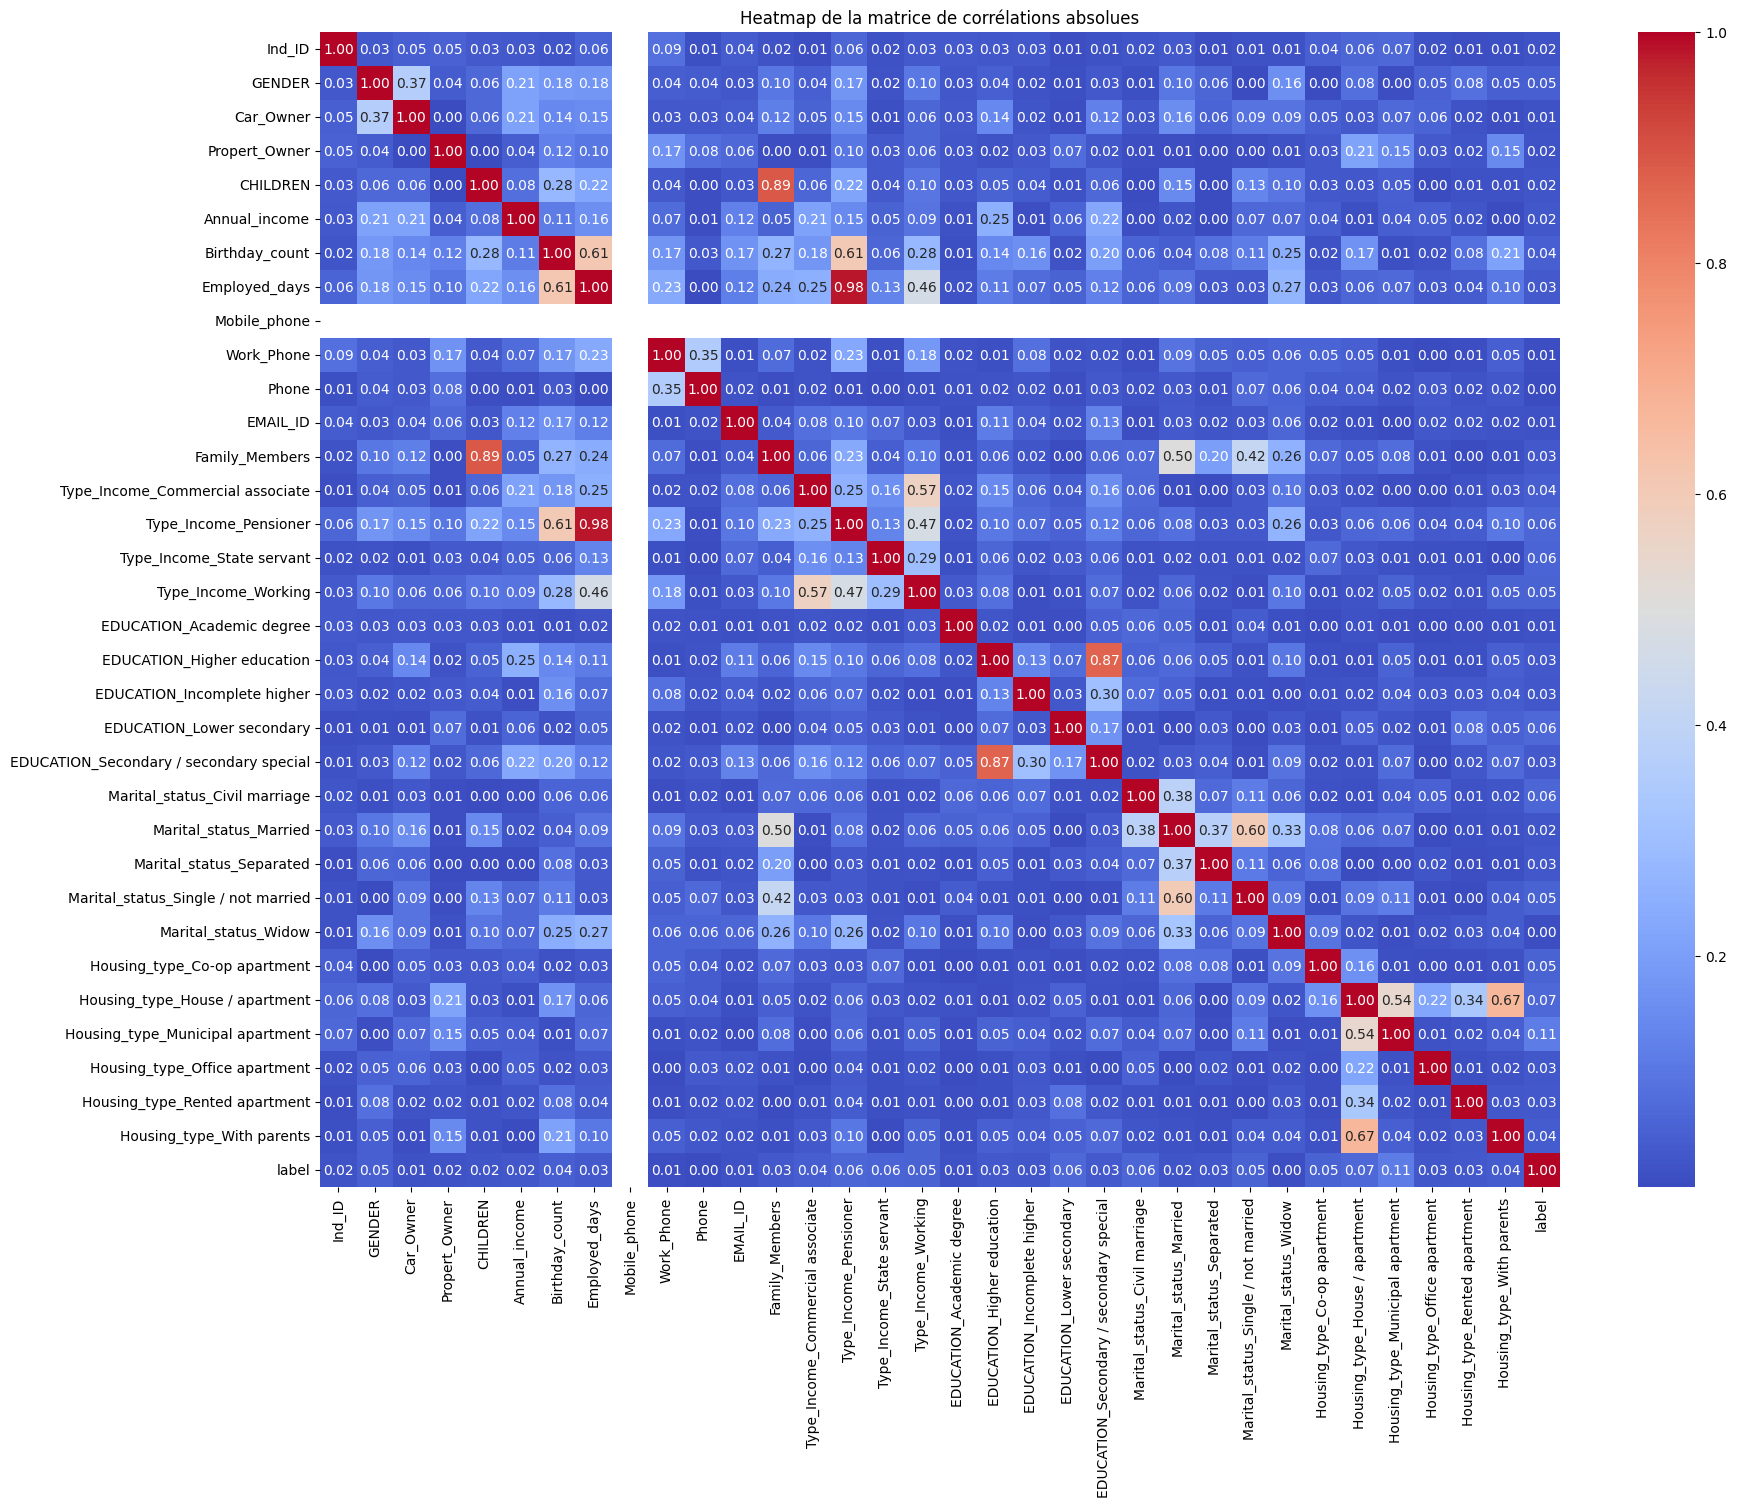

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix_abs, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap de la matrice de corrélations absolues')
plt.show()


**Interprétation et choix du modèle**

L'analyse de la matrice de corrélations a révélé une multicollinéarité modérée entre certaines caractéristiques, influençant le choix des modèles. **La régression logistique** a été sélectionnée malgré sa sensibilité à la multicollinéarité, grâce à sa capacité à fournir des probabilités de classe et à être interprétée facilement. **Les forêts aléatoires**, moins affectées par la multicollinéarité et capables de gérer des interactions complexes entre caractéristiques, ont été choisies comme second modèle pour leur robustesse et leur performance générale élevée, offrant ainsi un équilibre entre interprétabilité et précision prédictive





Préparation des ensembles de données d'entraînement et de test

**Entraînement du modèle de régression logistique**

Séparartion des caractéristiques (X) des étiquettes (y), puis divisons les données en ensembles d'entraînement et de test.






In [ ]:
from sklearn.model_selection import train_test_split

# Préparation des caractéristiques et des étiquettes
X = full_data.drop(['Ind_ID', 'label'], axis=1)
y = full_data['label']

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Réappliquer le prétraitement
Type_Occupation a été initialisé avec "Inconnu" pour les valeurs manquantes, nous l'encoderons en utilisant l'encodage One-Hot. Cela ajoutera des colonnes supplémentaires au DataFrame pour chaque catégorie unique dans Type_Occupation.

In [ ]:
full_data = pd.get_dummies(full_data, columns=['Type_Occupation'], drop_first=True)


Vérification des données numériques

In [ ]:
# Vérifier le type de données pour s'assurer qu'elles sont toutes numériques
full_data.dtypes


Ind_ID                                       int64
GENDER                                       int64
Car_Owner                                    int64
Propert_Owner                                int64
CHILDREN                                   float64
Annual_income                              float64
Birthday_count                             float64
Employed_days                              float64
Mobile_phone                                 int64
Work_Phone                                   int64
Phone                                        int64
EMAIL_ID                                     int64
Family_Members                             float64
Type_Income_Commercial associate             uint8
Type_Income_Pensioner                        uint8
Type_Income_State servant                    uint8
Type_Income_Working                          uint8
EDUCATION_Academic degree                    uint8
EDUCATION_Higher education                   uint8
EDUCATION_Incomplete higher    

**Réapplication de la division en ensembles d'entraînement et de test**

In [ ]:
# Préparation des caractéristiques et des étiquettes
X = full_data.drop(['Ind_ID', 'label'], axis=1)
y = full_data['label']

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Création du modèle de régression logistique
log_reg = LogisticRegression(max_iter=1000)

# Entraînement du modèle
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Création du modèle de forêts aléatoires
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement du modèle
random_forest.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

**calculez les différentes métriques permettant d’évaluer vos résultats**

**Visualisation de matrice de confusion des modèles**



In [ ]:
!pip install matplotlib seaborn


Régression Logistique - Rapport de classification :
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       280
           1       0.00      0.00      0.00        30

    accuracy                           0.90       310
   macro avg       0.45      0.50      0.47       310
weighted avg       0.82      0.90      0.86       310



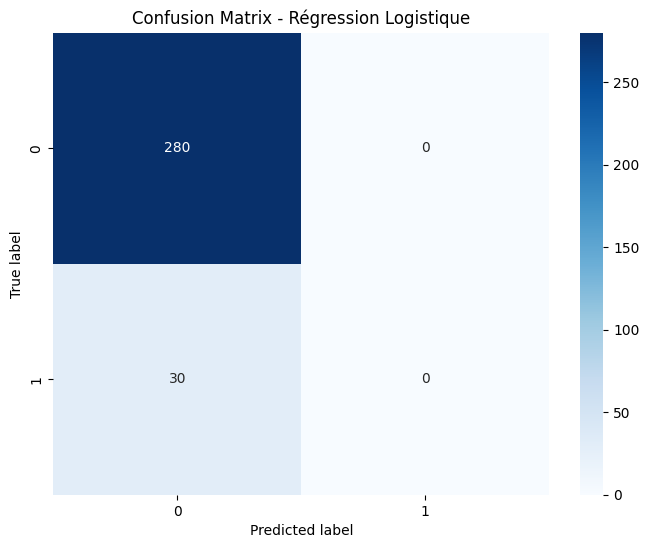

Forêts Aléatoires - Rapport de classification :
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       280
           1       1.00      0.37      0.54        30

    accuracy                           0.94       310
   macro avg       0.97      0.68      0.75       310
weighted avg       0.94      0.94      0.93       310



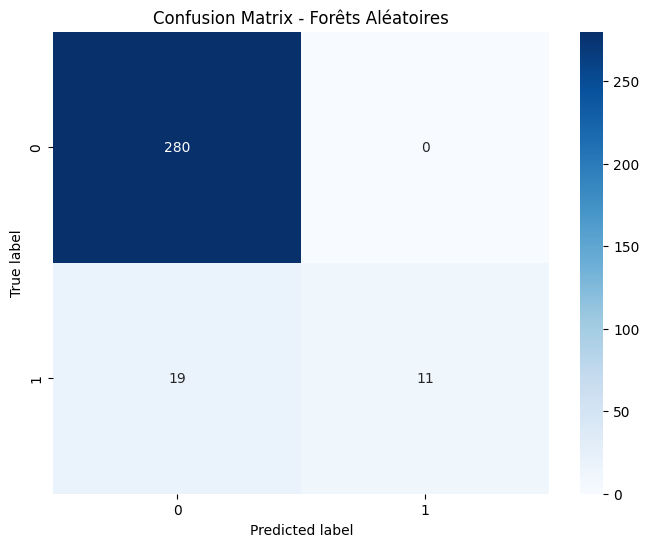

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Calcul et affichage du rapport de classification pour la Régression Logistique sans avertissement
print("Régression Logistique - Rapport de classification :\n",
      classification_report(y_test, y_pred_log_reg, zero_division=0))

# Affichage de la matrice de confusion pour la Régression Logistique
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plot_confusion_matrix(cm_log_reg, [0, 1], 'Confusion Matrix - Régression Logistique')

from sklearn.ensemble import RandomForestClassifier

# Assurez-vous que l'ensemble d'entraînement et de test est bien défini
# X_train, X_test, y_train, y_test = train_test_split(...)

# Entraînement du modèle de forêts aléatoires
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Effectuer les prédictions sur l'ensemble de test
y_pred_rf = random_forest.predict(X_test)

# Calcul et affichage du rapport de classification pour les Forêts Aléatoires
print("Forêts Aléatoires - Rapport de classification :\n",
      classification_report(y_test, y_pred_rf, zero_division=0))

# Affichage de la matrice de confusion pour les Forêts Aléatoires
cm_rf = confusion_matrix(y_test, y_pred_rf)
plot_confusion_matrix(cm_rf, [0, 1], 'Confusion Matrix - Forêts Aléatoires')


